# Problem Set 2
## Replicating figures from selected papers

Name: Juan Paolo B. Ignacio 

Student Number: 2021-07695 

Date of Creation: April 13, 2025 until April 18, 2025

### Defining the global and data paths for the replication.

Folders are organized in this way:
`Econ 138 Problem Set 2`
|
|__`Brazil`
|__`

In [10]:
# Define a global file path variable
file_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2"

In [11]:
!pip install geopandas
!pip install folium
!pip install osmnx
!pip install shapely
!pip install networkx
!pip install googlemaps

In [100]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from geopandas import points_from_xy
import matplotlib.pyplot as plt
import folium

import googlemaps
import osmnx as ox
import networkx as nx

from shapely.geometry import Point

In [101]:
from shapely.ops import unary_union

## #1: South Africa

Mettetal, E. (2019). Irrigation dams, water and infant mortality: Evidence from South Africa. Journal of Development Economics, 138, 17-40. Figure 2: Hydrodams in South Africa but instead of the river gradient, use the population density instead.


In [102]:
# Define the data path variable for South Africa
data_SA_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//South Africa"

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         213 non-null    int32         
 1   OBJECTID    213 non-null    int32         
 2   PROVINCE    213 non-null    object        
 3   CATEGORY    213 non-null    object        
 4   CAT2        213 non-null    object        
 5   CAT_B       213 non-null    object        
 6   MUNICNAME   213 non-null    object        
 7   NAMECODE    213 non-null    object        
 8   MAP_TITLE   213 non-null    object        
 9   DISTRICT    213 non-null    object        
 10  DISTRICT_N  213 non-null    object        
 11  DATE        213 non-null    datetime64[ms]
 12  Shape__Are  213 non-null    float64       
 13  Shape__Len  213 non-null    float64       
 14  geometry    213 non-null    geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(2), object(9)

<Axes: >

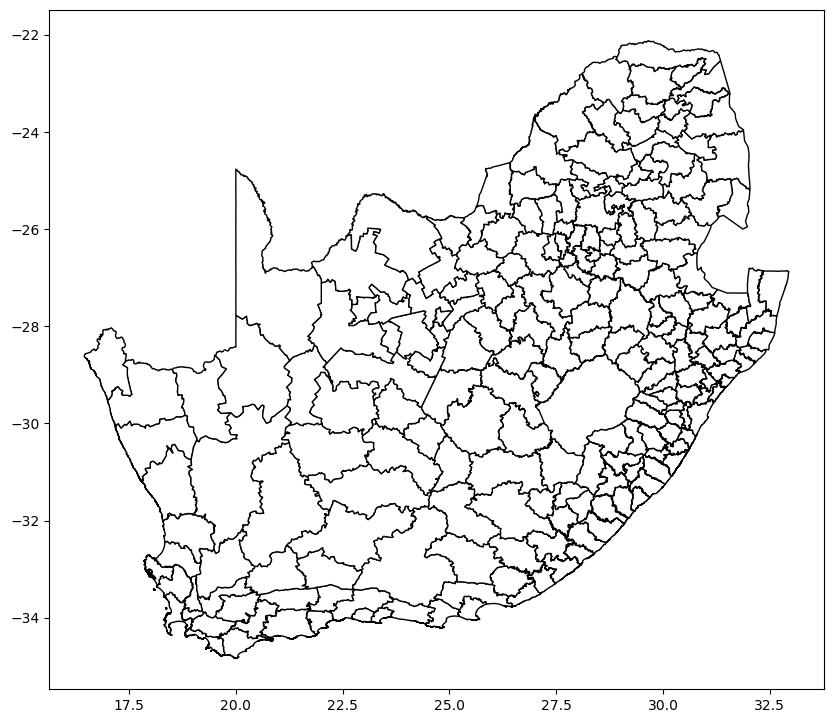

In [103]:
# Loading the local district boundaries of South Africa
sa_districts = gpd.read_file(os.path.join(data_SA_path, "SA_MDB_Local_Municipal_Boundary_2018//MDB_Local_Municipal_Boundary_2018.shp"))
sa_districts.info()

print(sa_districts.crs)
print(sa_districts.columns)
sa_districts

# Showing the map of the boundaries of South African districts
fig, ax = plt.subplots(figsize=(10, 10))
sa_districts.plot(ax=ax, color='white', edgecolor='black')

In [134]:
sa_districts

,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Are,Shape__Len,geometry
0,1,197,WC,B,Local Municipality,WC032,Overstrand,Overstrand (WC032),Overstrand Local Municipality,DC3,Overberg,2019-06-25,2.470202e+09,503100.219054,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -..."
1,2,138,WC,B,Local Municipality,WC033,Cape Agulhas,Cape Agulhas (WC033),Cape Agulhas Local Municipality,DC3,Overberg,2019-06-25,5.121204e+09,510469.485052,"POLYGON ((20.06351 -34.21699, 20.06491 -34.233..."
2,3,160,WC,B,Local Municipality,WC031,Theewaterskloof,Theewaterskloof (WC031),Theewaterskloof Local Municipality,DC3,Overberg,2019-06-25,4.774032e+09,407619.924636,"POLYGON ((19.2974 -33.88968, 19.31055 -33.9137..."
3,4,142,WC,B,Local Municipality,WC043,Mossel Bay,Mossel Bay (WC043),Mossel Bay Local Municipality,DC4,Garden Route,2019-06-25,2.921636e+09,361538.907987,"POLYGON ((22.12817 -33.85624, 22.13423 -33.869..."
4,5,141,WC,B,Local Municipality,WC042,Hessequa,Hessequa (WC042),Hessequa Local Municipality,DC4,Garden Route,2019-06-25,8.388296e+09,609407.058375,"POLYGON ((21.74781 -33.81114, 21.74785 -33.811..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,209,208,LIM,B,Local Municipality,LIM345,Collins Chabane,Collins Chabane (LIM345),Collins Chabane Local Municipality,DC34,Vhembe,2019-06-25,5.931389e+09,612925.637183,"POLYGON ((31.3449 -22.53453, 31.34739 -22.5420..."
209,210,206,LIM,B,Local Municipality,LIM343,Thulamela,Thulamela (LIM343),Thulamela Local Municipality,DC34,Vhembe,2019-06-25,3.122493e+09,352761.996820,"POLYGON ((30.91065 -22.47558, 30.91192 -22.475..."
210,211,200,LIM,B,Local Municipality,LIM351,Blouberg,Blouberg (LIM351),Blouberg Local Municipality,DC35,Capricorn,2019-06-25,1.130638e+10,568573.089745,"POLYGON ((28.87529 -22.44745, 28.8773 -22.4474..."
211,212,205,LIM,B,Local Municipality,LIM341,Musina,Musina (LIM341),Musina Local Municipality,DC34,Vhembe,2019-06-25,1.217129e+10,820095.819612,"POLYGON ((29.67528 -22.13901, 29.67583 -22.139..."


In [105]:
# Loading the dam locations in South Africa
sa_dams = pd.read_excel(os.path.join(data_SA_path, "Dams_south_africa.xlsx"))
sa_dams.info()

print(sa_dams[["Name of dam", "Latitude deg", "Longitude deg"]].head())

sa_dams

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10312 entries, 0 to 10311
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name of dam    10311 non-null  object 
 1   Latitude deg   10310 non-null  float64
 2   Lat min        10310 non-null  float64
 3   Lat sec        10310 non-null  float64
 4   Longitude deg  10310 non-null  float64
 5   Long min       10310 non-null  float64
 6   Long sec       10310 non-null  float64
dtypes: float64(6), object(1)
memory usage: 564.1+ KB
         Name of dam  Latitude deg  Longitude deg
0       NGOTWANE DAM          25.0           25.0
1      MAKGOPANE DAM          25.0           25.0
2    ROODEKOPJES DAM          25.0           27.0
3  HARTBEESPOORT DAM          25.0           27.0
4   BUFFELSPOORT DAM          25.0           27.0


,Name of dam,Latitude deg,Lat min,Lat sec,Longitude deg,Long min,Long sec
0,NGOTWANE DAM,25.0,11.0,54.0,25.0,48.0,48.0
1,MAKGOPANE DAM,25.0,5.0,54.2,25.0,52.0,57.0
2,ROODEKOPJES DAM,25.0,24.0,24.0,27.0,34.0,39.0
3,HARTBEESPOORT DAM,25.0,43.0,32.3,27.0,50.0,54.1
4,BUFFELSPOORT DAM,25.0,46.0,49.5,27.0,29.0,14.5
...,...,...,...,...,...,...,...
10307,TSHAKHUMA DAM,23.0,1.0,58.0,30.0,16.0,55.0
10308,KORENTEPOORT DAM,34.0,0.0,17.4,21.0,9.0,56.4
10309,GRASSRIDGE DAM,31.0,46.0,4.2,25.0,27.0,57.9
10310,KNELLPOORT DAM,29.0,46.0,54.4,26.0,53.0,19.2


In [114]:
# Converting the latitude deg and longitude deg values into decimal degrees.
sa_dams["Latitude"] = -sa_dams["Latitude deg"] - sa_dams["Lat min"]/60 - sa_dams["Lat sec"]/3600
sa_dams["Longitude"] = sa_dams["Longitude deg"] + sa_dams["Long min"]/60 + sa_dams["Long sec"]/3600
print(sa_dams[["Name of dam", "Latitude", "Longitude"]].head())

# Adding a geometry column in the sa_dams dataframe for conversion into geodata
sa_dams['geometry'] = points_from_xy(sa_dams['Longitude'], sa_dams['Latitude'])

# Converting it into geodata
sa_dams_gdf = gpd.GeoDataFrame(sa_dams, geometry='geometry')

# Optionally, set a Coordinate Reference System (CRS), e.g., EPSG:4326 (WGS84)
sa_dams_gdf.set_crs(epsg=4326, inplace=True)


         Name of dam   Latitude  Longitude
0       NGOTWANE DAM -25.198333  25.813333
1      MAKGOPANE DAM -25.098389  25.882500
2    ROODEKOPJES DAM -25.406667  27.577500
3  HARTBEESPOORT DAM -25.725639  27.848361
4   BUFFELSPOORT DAM -25.780417  27.487361


,Name of dam,Latitude deg,Lat min,Lat sec,Longitude deg,Long min,Long sec,Latitude,Longitude,geometry
0,NGOTWANE DAM,25.0,11.0,54.0,25.0,48.0,48.0,-25.198333,25.813333,POINT (25.81333 -25.19833)
1,MAKGOPANE DAM,25.0,5.0,54.2,25.0,52.0,57.0,-25.098389,25.882500,POINT (25.8825 -25.09839)
2,ROODEKOPJES DAM,25.0,24.0,24.0,27.0,34.0,39.0,-25.406667,27.577500,POINT (27.5775 -25.40667)
3,HARTBEESPOORT DAM,25.0,43.0,32.3,27.0,50.0,54.1,-25.725639,27.848361,POINT (27.84836 -25.72564)
4,BUFFELSPOORT DAM,25.0,46.0,49.5,27.0,29.0,14.5,-25.780417,27.487361,POINT (27.48736 -25.78042)
...,...,...,...,...,...,...,...,...,...,...
10307,TSHAKHUMA DAM,23.0,1.0,58.0,30.0,16.0,55.0,-23.032778,30.281944,POINT (30.28194 -23.03278)
10308,KORENTEPOORT DAM,34.0,0.0,17.4,21.0,9.0,56.4,-34.004833,21.165667,POINT (21.16567 -34.00483)
10309,GRASSRIDGE DAM,31.0,46.0,4.2,25.0,27.0,57.9,-31.767833,25.466083,POINT (25.46608 -31.76783)
10310,KNELLPOORT DAM,29.0,46.0,54.4,26.0,53.0,19.2,-29.781778,26.888667,POINT (26.88867 -29.78178)


In [115]:
print(sa_districts.crs)  # Check the CRS of district boundaries
print(sa_dams_gdf.crs)   # Check the CRS of dam points

EPSG:4326
EPSG:4326


C:\Users\Juan Paolo Ignacio\AppData\Local\Temp\ipykernel_22212\2591290722.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


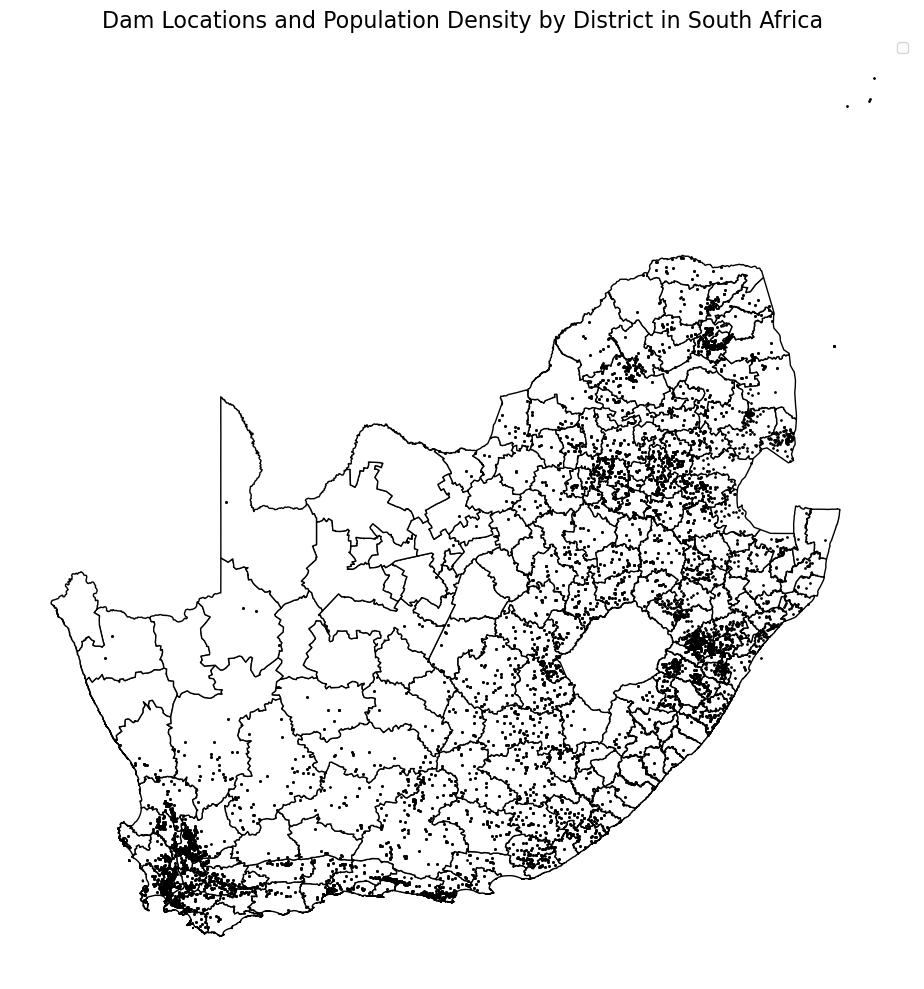

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))
sa_districts.plot(ax=ax, color='white', edgecolor='black')
sa_dams_gdf.plot(ax=ax, color='black', markersize=1)

plt.title("Dam Locations and Population Density by District in South Africa", fontsize=16)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
# Getting the population data from the 1996 Census 10% sample
sa_popn = pd.read_csv(os.path.join(data_SA_path, "census-1996-person-v1.3.csv"))
sa_popn.info()
sa_popn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621201 entries, 0 to 3621200
Data columns (total 52 columns):
 #   Column    Dtype  
---  ------    -----  
 0   province  int64  
 1   district  int64  
 2   dccode    int64  
 3   newla     int64  
 4   hhnumber  int64  
 5   personno  int64  
 6   hhrecord  object 
 7   urban     int64  
 8   insttype  int64  
 9   sex       int64  
 10  age       int64  
 11  relship   int64  
 12  marstau   int64  
 13  race      int64  
 14  languag1  int64  
 15  languag2  int64  
 16  religion  int64  
 17  birthcou  int64  
 18  citizenc  int64  
 19  citizeno  int64  
 20  citizenr  int64  
 21  migworke  int64  
 22  tempresi  int64  
 23  usualdis  int64  
 24  movedy2   int64  
 25  moveddis  int64  
 26  disablec  int64  
 27  sight     int64  
 28  hearing   int64  
 29  physical  int64  
 30  mental    int64  
 31  motheral  int64  
 32  fatheral  int64  
 33  chilborn  int64  
 34  childliv  int64  
 35  agefrstb  int64  
 36  bornlast

,province,district,dccode,newla,hhnumber,personno,hhrecord,urban,insttype,sex,...,econactt,worktime,wmployme,occupat,lstwrk1,industr,workingd,income,pespweig,hhid
0,1,126,1001,10121,1,1,H,1,98,2,...,2,7,7,987,513,7,97,3,10.712,01 00001001 00000126 00010121 00001
1,1,126,1001,10121,1,2,H,1,98,2,...,6,7,7,987,987,7,97,1,10.859,01 00001001 00000126 00010121 00001
2,1,126,1001,10121,1,3,H,1,98,1,...,97,7,7,987,987,7,97,1,10.859,01 00001001 00000126 00010121 00001
3,1,126,1001,10121,2,1,H,1,98,1,...,1,1,3,232,987,92,126,9,10.712,01 00001001 00000126 00010121 00002
4,1,126,1001,10121,2,2,H,1,98,2,...,1,1,3,232,987,92,126,9,10.712,01 00001001 00000126 00010121 00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621196,9,921,9002,90150,99999,1,S,2,8,1,...,98,8,8,988,988,8,98,98,11.448,09 00009002 00000921 00090150 99999
3621197,9,921,9002,90150,99999,1,S,2,8,2,...,98,8,8,988,988,8,98,98,11.448,09 00009002 00000921 00090150 99999
3621198,9,921,9002,90150,99999,1,S,2,8,1,...,98,8,8,988,988,8,98,98,11.448,09 00009002 00000921 00090150 99999
3621199,9,921,9002,90150,99999,1,S,2,8,2,...,98,8,8,988,988,8,98,98,11.448,09 00009002 00000921 00090150 99999


In [133]:
# Filter or summarize population data by district
sa_popn_district = sa_popn.groupby("district")["personno"].sum()

# Display results
print(sa_popn_district)

district
101     68783
102     90926
103     39842
104     17942
105    140545
        ...  
927     81754
928     56619
929     22314
930    107339
931     59731
Name: personno, Length: 354, dtype: int64


In [ ]:

# --- Load population density raster ---
pop_density_path = "path_to/population_density.tif"
with rasterio.open(pop_density_path) as src:
    pop_data = src.read(1)
    profile = src.profile

# --- Function to compute average population density per district ---
def population_density(districts_gdf, raster_path):
    densities = []
    with rasterio.open(raster_path) as src:
        for _, row in districts_gdf.iterrows():
            geom = [mapping(row["geometry"])]
            try:
                out_image, _ = rasterio.mask.mask(src, geom, crop=True)
                data = out_image[0]
                data = data[data != src.nodata]
                avg_density = data.mean()
            except:
                avg_density = np.nan
            densities.append(avg_density)
    return pd.Series(densities)

# --- Apply function and store result ---
districts["avg_pop_density"] = average_population_density(districts, pop_density_path)

# --- Plot the map ---
fig, ax = plt.subplots(figsize=(12, 10))
districts.plot(column="avg_pop_density", cmap="YlGnBu", legend=True, ax=ax, edgecolor="gray", linewidth=0.5)
dams.plot(ax=ax, color="red", markersize=8, label="Irrigation Dams")

plt.title("Dam Locations and Population Density by District", fontsize=16)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()


## #2: Ethiopia

Fried, S., & Lagakos, D. (2021). Rural electrification, migration and structural transformation: Evidence from Ethiopia. Regional Science and Urban Economics, 91, 103625. Figure 4: Ethiopian Population density and ERSS Sample Villages


In [22]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import pandas as pd
from shapely.geometry import Point
from shapely.ops import transform
import osmnx as ox

In [3]:
# Define the data path variable for Ethiopia
data_Ethiopia_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Ethiopia"

In [9]:
# Load Ethiopia districts
eth_districts_gdf = gpd.read_file(os.path.join(data_Ethiopia_path, "Ethiopia_AdminBoundaries-shp//Ethiopia_AdminBoundaries.shp"))
print(eth_districts_gdf.crs)
eth_districts_gdf

EPSG:4326


,OBJECTID,REGIONNAME,ZONENAME,WOREDANO_,WOREDANAME,GlobalID,Shape__Are,Shape__Len,geometry
0,1,Addis Ababa,Region 14,140102,Nefas Silk,695a39eb-38a2-4680-82e3-c34d7559ee45,6.019472e+07,42074.127942,"MULTIPOLYGON (((38.70186 8.92537, 38.70185 8.9..."
1,2,Addis Ababa,Region 14,140104,Bole,d21bf315-15e2-40eb-9a55-92e102600a0f,1.317679e+08,57202.004332,"POLYGON ((38.89908 8.95556, 38.89754 8.95547, ..."
2,3,Addis Ababa,Region 14,140105,Lideta,7f82355a-ed21-48bd-9d49-2e3cb58b824b,1.134951e+07,20053.075002,"POLYGON ((38.75398 9.01721, 38.75398 9.01718, ..."
3,4,Addis Ababa,Region 14,140106,Kirkos,deb15e6d-331b-433e-bdb8-cd5dfca4bb79,1.512233e+07,19354.492903,"POLYGON ((38.76493 9.02229, 38.76499 9.02216, ..."
4,5,Addis Ababa,Region 14,140107,Yeka,1f7e0179-f18e-43c1-9838-9ad28d2a6e1a,8.901921e+07,47690.016803,"POLYGON ((38.89684 9.02942, 38.89097 9.02327, ..."
...,...,...,...,...,...,...,...,...,...
679,680,SNNPR,Gurage,070109,Gumer,823c7b7c-ab26-4255-b459-d4ea57fdffc8,2.042026e+08,67203.178529,"POLYGON ((38.0664 7.89435, 38.06031 7.88358, 3..."
680,681,SNNPR,Segen Peoples',None,Alle,f689ede0-c182-4331-aa83-cdb26c99382e,1.065196e+09,183068.475861,"POLYGON ((37.12637 5.72452, 37.12725 5.72444, ..."
681,682,SNNPR,Segen Peoples',071601,Derashe,9e03bdc6-a6b3-41f4-a48e-7b95682fb9b3,7.265555e+08,179539.187123,"POLYGON ((37.56279 5.71065, 37.56576 5.69569, ..."
682,683,SNNPR,Gamo Gofa,071012,Kemba,d269c6a4-ba68-4f20-b6cd-4f9a70f03bc9,1.264534e+09,186707.754503,"POLYGON ((37.2945 5.98755, 37.28325 5.98294, 3..."


In [5]:
# Load road data
roads = gpd.read_file(os.path.join(data_Ethiopia_path, "ethiopia_roads//Ethiopia_Roads.shp"))
print(roads.crs)
roads

EPSG:4326


C:\Users\Juan Paolo Ignacio\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured LineString' is converted to 'LineString'
  return ogr_read(


,LINKNO,ROADNO,STARTKM,ENDKM,LENGTHKM,STARTDESC,ENDDESC,CLASSLOC,CLASS,REGION,WIDTH,LANES,PAVEMTYPE,SURFTYPE,CONDITION,AADT,geometry
0,A3-8,A3,0.0,54.0,54.00,Bahirdar,Woreta,Trunk,Primary,Amhara,7.0,2.0,Asphalt,Paved,Very Good,481.0,"LINESTRING (37.69034 11.91356, 37.69021 11.913..."
1,A3-9,A3,0.0,102.0,102.00,Woreta,Azezo Airport,Trunk,Primary,Amhara,7.0,2.0,Asphalt,Paved,Very Good,572.0,"LINESTRING (37.42349 12.54866, 37.42343 12.547..."
2,A3-a,A3,0.0,7.0,7.00,Fiche,Commando,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Very Good,500.0,"LINESTRING (38.74157 9.80978, 38.74088 9.80802..."
3,A4-1,A4,0.0,40.0,40.00,Addis,Holeta,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Very Good,544.0,"LINESTRING (38.49822 9.07636, 38.503 9.0795, 3..."
4,A4-2,A4,0.0,85.0,84.88,Holeta,Ambo,Trunk,Primary,Oramia,0.0,2.0,ST,Paved,Unknown,544.0,"LINESTRING (37.85817 8.98209, 37.86025 8.98208..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,A2-8a,A2,0.0,68.0,68.00,Alamata,Moheny - Michew,Trunk,Primary,Tigray,7.0,2.0,Unpaved,Unpaved,Poor,200.0,"LINESTRING (39.55844 12.41391, 39.56115 12.416..."
72,A2-8b,A2,0.0,68.0,68.00,Moheny,Hewane,Trunk,Primary,Tigray,7.0,2.0,Unpaved,Unpaved,Poor,200.0,"LINESTRING (39.64221 12.79376, 39.6448 12.7994..."
73,A10-6,A10,0.0,51.0,51.00,Harar,Bombas,Trunk,Primary,Oramia,7.0,2.0,Gravel,Unpaved,Unknown,734.0,"LINESTRING (42.1218 9.31263, 42.12193 9.31264,..."
74,A5-6,A5,0.0,41.0,41.00,Jimma,Bedele,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Unknown,385.0,"LINESTRING (36.83185 7.67618, 36.8342 7.67918,..."


In [6]:
# Load electricity transmission network data
eltrc_network = gpd.read_file(os.path.join(
    data_Ethiopia_path, "ethiopia-electricity-transmission-network//Ethiopia Electricity Transmission Network.shp")
                     )
print(eltrc_network.crs)
eltrc_network

EPSG:4326


,COUNTRY,CNTRY_NAME,VOLTAGE_KV,FROM_NM,TO_NM,STATUS,SOURCES,PROJECT_NM,geometry
0,ETH,ETHIOPIA,66,ADWA,ENDASILASIE,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.27211 14.08944, 38.88819 14.14845)"
1,ETH,ETHIOPIA,132,MEKELE,ADWA,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.88819 14.14845, 39.00201 13.838..."
2,ETH,ETHIOPIA,132,MEKELE,ADIGRAT,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.47528 13.49667, 39.59 13.79, 39..."
3,ETH,ETHIOPIA,230,MEKELE,TEKEZE,Under Construction,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.47528 13.49667, 38.71 13.3)"
4,ETH,ETHIOPIA,230,ALAMATA,MEKELE,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.5618 12.41469, 39.65293 12.6018..."
...,...,...,...,...,...,...,...,...,...
95,ETH,ETHIOPIA,66,DIREDAWA,HARER,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (41.86667 9.58333, 41.8726 9.56553,..."
96,ETH,ETHIOPIA,45,ADDISABABA,DEBREZEYT,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.98622 8.74522, 38.78869 8.96225..."
97,ETH,ETHIOPIA,45,ADDISABABA,GEJADERA,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.65 8.76667, 38.76856 8.971)"
98,ETH,ETHIOPIA,400,SODDO,GILGEL GIBE III,Under Construction,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (37.76393 6.86822, 37.32099 6.84769)"


In [7]:
# Load generators data
gen = gpd.read_file(os.path.join(data_Ethiopia_path, "Ethiopia_-_generators-shp//Ethiopia_-_generators.shp"))
print(gen.crs)
gen

EPSG:4326


,PPE__Gener,Location,Sub_locati,Asset_Prof,Pcode,LongX,LatY,Descriptio,Model,Acquisitio,Tag_Number,Custodian,Status,NBV_USD,FID,geometry
0,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GEN PERKINS 45 KVA WATER COOLE,None,2008,86051,UNHCR,Damaged,0.000000,1,POINT (38.72845 8.99829)
1,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GENERATOR,None,2009,522841,AFRICAN HUMANITARIAN AID & DEV.,Damaged,0.000000,2,POINT (38.72845 8.99829)
2,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,"GENERATOR 10 KWA, DIESEL","Generator 10 KWA, Diesel",2012,557829,UNHCR,In Service,0.000000,3,POINT (38.72845 8.99829)
3,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GENERATOR WITH PERKINS ENGINE,None,2013,611050,UNHCR,In Service,0.000000,4,POINT (38.72845 8.99829)
4,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,"GENERATOR, PERKINS, WC/60 KVA",None,2011,557731,UNHCR,Damaged,0.000000,5,POINT (38.72845 8.99829)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,GENERATOR,None,2010,557677,UNHCR,Damaged,0.000000,96,POINT (34.59026 8.23917)
96,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,GENERATOR WITH PERKINS ENGINE,None,2012,557817,UNHCR,Damaged,0.000000,97,POINT (34.59026 8.23917)
97,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,"PERKINS GEN 100 KVA, WATER COO",None,2014,611441,UNHCR,In Service,3377.310059,98,POINT (34.59026 8.23917)
98,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,"PERKINS GEN 60 KVA, WATER COOL",None,2015,624344,UNHCR,In Service,5370.160156,99,POINT (34.59026 8.23917)


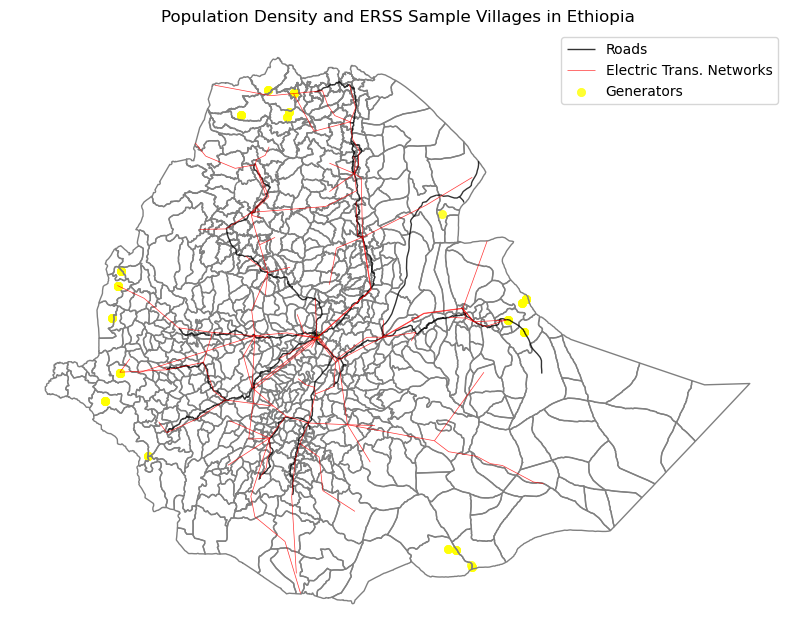

In [28]:
# Plotting the shapefiles first before updating it with population density variable
fig, ax = plt.subplots(figsize=(10, 10))
eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)
eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)
gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)


plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()

In [36]:
# Load ERSS sample villages (with lat/lon columns)
erss_villages = pd.read_csv(os.path.join(data_Ethiopia_path, "ETH_2011_ERSS_v02_M_CSV//pub_eth_householdgeovariables_y1.csv"))
erss_villages

,household_id,ea_id,qa_type,dist_road,dist_popcenter,dist_market,dist_borderpost,dist_admctr,af_bio_1,af_bio_8,...,eviarea_avg,evimax_avg,grn_avg,sen_avg,h2011_eviarea,h2011_evimax,h2011_grn,h2011_sen,LAT_DD_MOD,LON_DD_MOD
0,1010101601002,1010101601,1,50.3,53.2,105.3,133.9,198.4,264,258,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
1,1010101601017,1010101601,1,50.0,52.9,105.6,134.6,198.0,263,257,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
2,1010101601034,1010101601,1,46.0,49.2,100.1,135.1,194.6,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
3,1010101601049,1010101601,1,46.0,49.2,100.1,135.1,194.6,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
4,1010101601064,1010101601,1,46.1,49.3,100.1,135.0,194.8,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,15010203102067,15010203102,1,19.6,53.3,54.8,110.9,56.3,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3913,15010203102087,15010203102,1,19.3,53.1,54.6,111.3,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3914,15010203102099,15010203102,1,19.4,53.0,54.5,111.2,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3915,15010203102109,15010203102,1,19.4,53.0,54.5,111.3,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967


In [38]:
# Load World Bank survey data
erss_villages = pd.read_csv(os.path.join(data_Ethiopia_path, "ETH_2011_ERSS_v02_M_CSV//pub_eth_householdgeovariables_y1.csv"))
erss_villages = erss_villages.groupby("ea_id").agg({
    "LAT_DD_MOD": "mean",
    "LON_DD_MOD": "mean"
}).reset_index()

# Create a GeoDataFrame for survey data
geometry = [Point(xy) for xy in zip(erss_villages["LON_DD_MOD"], erss_villages["LAT_DD_MOD"])]
erss_villages_geo = gpd.GeoDataFrame(erss_villages, geometry=geometry, crs="EPSG:4326")
erss_villages_geo = erss_villages_geo.to_crs(eth_districts_gdf.crs)

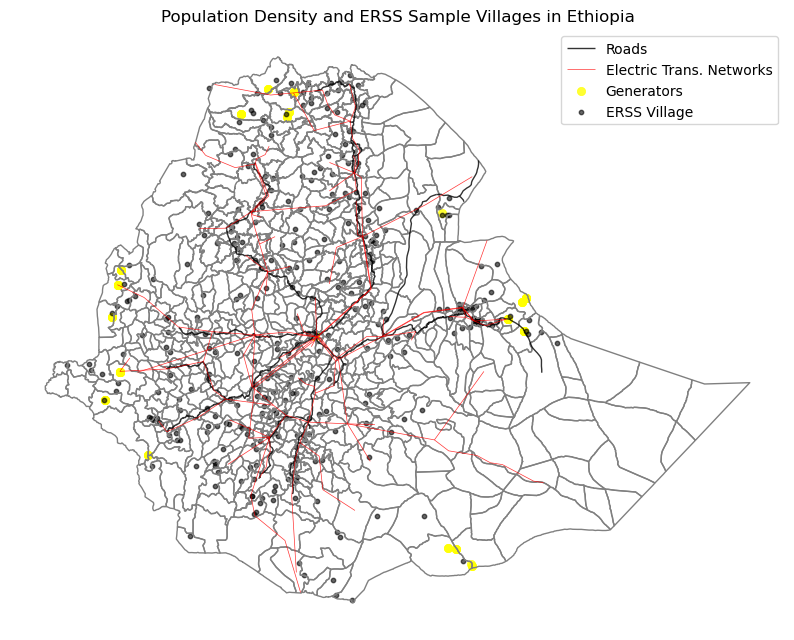

In [40]:
# Overlaying the dots for the ERSS villages on the map.
fig, ax = plt.subplots(figsize=(10, 10))
eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)
eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)
gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)
erss_villages_geo.plot(ax=ax, color="black", marker='o', markersize=10, alpha=0.6, label="ERSS Village")

plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()


In [41]:
# Getting the population data of Ethiopia (2020)
eth_popden = rasterio.open(os.path.join(data_Ethiopia_path, "eth_ppp_2020.tif"))
eth_districts_gdf = eth_districts_gdf.to_crs(eth_popden.crs)

In [49]:
# Mask population raster to Ethiopia districts
shapes = [feature["geometry"] for feature in eth_districts_gdf.__geo_interface__["features"]]
out_image, out_transform = mask(eth_popden, shapes, crop=True)
out_meta = eth_popden.meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

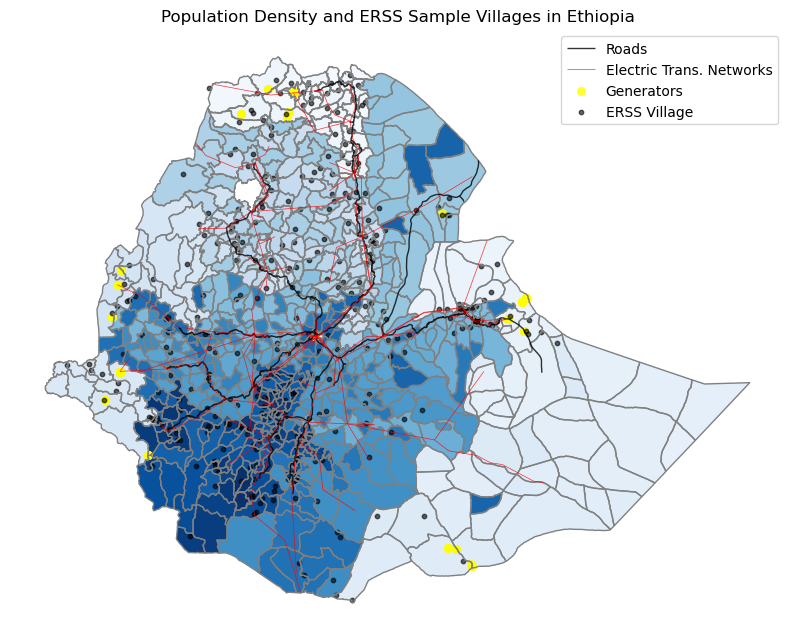

In [54]:
# Overlaying the dots for the ERSS villages on the map.
fig, ax = plt.subplots(figsize=(10, 10))
eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
eth_districts_gdf.plot(ax=ax, legend=True, cmap="Blues", 
                      legend_kwds={"label": "Population Density (people/km²)", "orientation": "horizontal"})
roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)
eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)
gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)
erss_villages_geo.plot(ax=ax, color="black", marker='o', markersize=10, alpha=0.6, label="ERSS Village")

plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()

## #3: Vietnam

Balboni, C. (2025). In harm's way? infrastructure investments and the persistence of coastal cities. American Economic Review, 115(1), 77-116. Figure 3: Roadmap of Vietnam (not necessarily in 2010 but still replicate the road types)


In [25]:
# Define the data path variable for Vietnam
data_Vietnam_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Vietnam"

## #4: Brazil

Morten, M., & Oliveira, J. (2024). The effects of roads on trade and migration: Evidence from a planned capital city. American Economic Journal: Applied Economics, 16(2), 389-421. Figure 1: Brazil's Capital and Main Road Infrastructure.


In [81]:
# Define the data path variable for Vietnam
data_Brazil_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil"

In [104]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# Set your data directory
GIS_data = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil//Data//GIS_data"

In [91]:
# Read and simplify shapefiles
def read_and_simplify(path, tolerance=0.01):
    gdf = gpd.read_file(path)
    return gdf.simplify(tolerance, preserve_topology=True)

# Load datasets
states = read_and_simplify(os.path.join(GIS_data, "uf1940//uf1940_prj.shp"))
highways = gpd.read_file(os.path.join(GIS_data, "roads//2000//highways_2000_prj.shp"))

In [92]:
# Categorize radial and non-radial highways
non_radial_highways = highways[
    (highways["dm_anlys_p"] == 1) & (highways["dm_radial"] == 0)
]
radial_highways = highways[
    (highways["dm_anlys_p"] == 1) & (highways["dm_radial"] == 1)
]


In [97]:
# Load and simplify the minimum spanning tree (MST) shapefile for pie distribution
mst_pie = gpd.read_file(os.path.join(GIS_data, "mst//mst_pie_prj.shp"))
mst_pie

,PATHID,PATHCOST,REGION1,REGION2,geometry
0,6,1.807626,22,23,"LINESTRING (-34.954 -8.09086, -35.01555 -8.222..."
1,7,1.781380,24,23,"LINESTRING (-37.05691 -10.85093, -36.92548 -10..."
2,8,4.462587,19,18,"LINESTRING (-42.83992 -5.06792, -42.70849 -5.0..."
3,9,4.072512,20,18,"LINESTRING (-35.21687 -5.85651, -35.3483 -5.78..."
4,11,11.973323,19,1,"LINESTRING (-42.83992 -5.06792, -42.90121 -5.1..."
5,13,1.406314,20,21,"LINESTRING (-35.21687 -5.85651, -35.1743 -5.98..."
6,14,0.945738,22,21,"LINESTRING (-34.954 -8.09086, -34.92778 -7.959..."
7,3,5.695476,1,8,"LINESTRING (-47.83434 -15.84535, -47.85032 -15..."
8,5,8.730128,17,8,"LINESTRING (-44.28567 -2.57071, -44.35492 -2.7..."
9,7,4.421051,17,5,"LINESTRING (-44.28567 -2.57071, -44.41711 -2.5..."


In [98]:
mst_pie["geometry"] = mst_pie["geometry"].simplify(tolerance=0.01, preserve_topology=True)
mst_pie_simple = mst_pie

In [99]:
# Read city data
capital_cities = gpd.read_file(os.path.join(secdata, "cities//brazil_capital_cities_prj.shp"))
capital_cities["X"] = capital_cities.geometry.x
capital_cities["Y"] = capital_cities.geometry.y

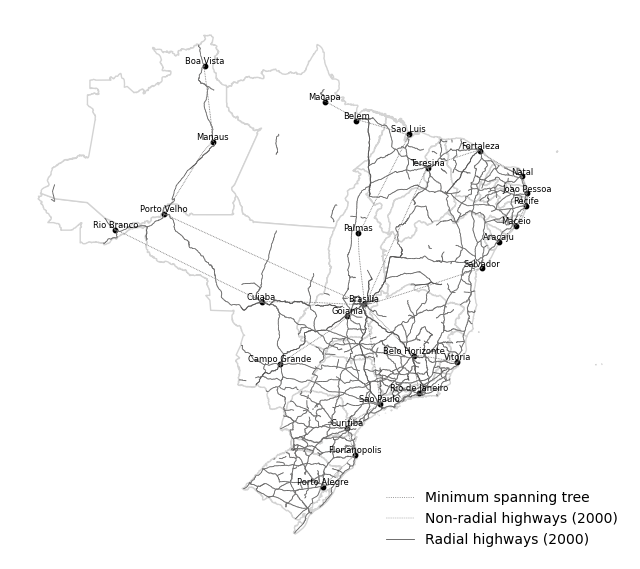

In [108]:
# --- Figure 1: Main Text ---
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting the state boundaries
states.plot(ax=ax, facecolor="white", edgecolor="lightgray")

# Plotting the highways
highways.plot(ax=ax, linewidth=0.6, color="#565555", label="Road Infrastructure highways (2000)")

# Plotting the minimum spanning tree
mst_pie_simple.plot(
    ax=ax, linewidth=0.6, linestyle=(0, (1, 1)), color="#777676", label="Minimum spanning tree"
)

# Plot non-radial highways with a dashed line style
non_radial_highways.plot(
    ax=ax, linewidth=0.3, linestyle="--", color="#868686", label="Non-radial highways (2000)"
)

# Plot radial highways with a solid line style
radial_highways.plot(
    ax=ax, linewidth=0.6, linestyle="-", color="#565555", label="Radial highways (2000)"
)

# Plotting the dots and labeling them with city names
ax.scatter(capital_cities["X"], capital_cities["Y"], s=10, color="black")

# Label all cities
for idx, row in capital_cities.iterrows():
    ax.text(row["X"], row["Y"], row["CITY_NAME"], fontsize=6, ha='center', va='bottom')

# Add a legend for line types and colors
legend_elements = [
    Line2D([0], [0], color="#777676", lw=0.6, linestyle="dotted", label="Minimum spanning tree"),
    Line2D([0], [0], color="#868686", lw=0.3, linestyle="dashed", label="Non-radial highways (2000)"),
    Line2D([0], [0], color="#565555", lw=0.6, linestyle="-", label="Radial highways (2000)"),
]
ax.legend(handles=legend_elements, loc="lower right", frameon=False)

# Remove axis lines, ticks, and text for a clean map appearance
ax.axis("off")

plt.show()